In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import collections

%matplotlib inline
plt.style.use('ggplot')


Let's focus on the stops and not the bus lines since we want to learn more about student wait times at bus stops.

The data sheets are organized according to bus lines, so need to merge student loads across data sheets according to bus stop. For now, will be ok to read in the monthly totals for each stop.

At some point, reading in the daily totals would be useful to measure the day-to-day variability. Measuring ridership as a function of weather is also a possibility but the UCM campus is located uphill and approximately a 1.5-mile minimum from residential housing (homes and apartments), suggesting it is unlikely students will prefer walking to taking the bus. Students residing in the dormitories ar within walking distance (how close and is there a bus line that caters to these students?) and do not use the bus.



Once again, the most informative sheets in the workbooks containing October 2018 and February 2019 student ridership information consist of these bus lines: 'C1 BLUE', 'C1-GOLD', 'C2 - EXPRESS', 'G-Line'. Thus, will continue to read those sheets into a pandas df.

Nota bene: Layout of load data in xlsx for bus lines 'C1 BLUE', 'C1-GOLD' and 'C2 - EXPRESS' are the same for both spreadsheets. The last bus line, 'G-Line' will have to be treated differently.


In [2]:
use_sheets = ['C1 BLUE', 'C1-GOLD', 'C2 - EXPRESS', 'G-Line']
df_names = ['feb_c1_blue', 'feb_c1_gold', 'feb_c2_exp', 'feb_gline', 
            'oct_c1_blue', 'oct_c1_gold', 'oct_c2_exp', 'oct_gline']


In [3]:
file1 = '219-CATTRACKS Fall 2019- February Billing.xlsx'
file2 = 'CATTRACKS Fall 2018- October Billing.xlsx'

load_dicts = {}
for i in range(len(use_sheets)):
    load_dicts[df_names[i]] = pd.read_excel(file1, use_sheets[i])
    load_dicts[df_names[i+4]] = pd.read_excel(file2, use_sheets[i])


The first five rows and first column in each of the data sheets (turned pandas dataframes) do not contain ridership information, so will remove them. 

In [4]:
for k, v in load_dicts.items():
    load_dicts[k] = v.iloc[4:,1:]

In [5]:
# Will want an ordered dictionary since I am using brute means to slice data to pull bus line, 
# stop and student load data

collections.OrderedDict(load_dicts)
# load_dicts.keys()

OrderedDict([('feb_c1_blue',
                           Unnamed: 1  Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5  \
              4         C1 Blue -Line       545.0       704.0       843.0      1002.0   
              5        Granville Apts         0.0         0.0         0.0         0.0   
              6               Walmart         0.0         0.0         0.0         0.0   
              7     Meadows/Olivewood         0.0         0.0         0.0         0.0   
              8    Alexander & "G" St         0.0         0.0         0.0         0.0   
              ..                  ...         ...         ...         ...         ...   
              307      Granville Apts         0.0         0.0         4.0         1.0   
              308                 NaN         0.0         0.0         0.0         0.0   
              309                 NaN         0.0         0.0         0.0         0.0   
              310                 NaN         0.0         0.0         0.0        

Total loads data is found in first set of rows and last set of columns
Will remove all others according to type (eg., Nans and non-informative data)

In [6]:
'''
Use vi editor to code change of all occurrences of 'feb' to 'oct' for commands in this cell and next cell
In command mode, used:
:%s/feb/oct/g
'''

# Hate that I am doing this brute force, but didn't know how to slice these totals otherwise.
# Can loop through key names, but cannot loop through iloc portion

feb_c1b = load_dicts['feb_c1_blue'].iloc[:20, 85:99]
feb_c1g = load_dicts['feb_c1_gold'].iloc[:20, 80:93]
feb_c2e = load_dicts['feb_c2_exp'].iloc[:14, 105:123]
feb_g = load_dicts['feb_gline'].iloc[:12, 100:117]
oct_c1b = load_dicts['oct_c1_blue'].iloc[:20, 85:99]
oct_c1g = load_dicts['oct_c1_gold'].iloc[:20, 80:93]
oct_c2e = load_dicts['oct_c2_exp'].iloc[:14, 105:123]
oct_g = load_dicts['oct_gline'].iloc[:12, 90:105]

In [7]:
# Only c1_blue and c1_gold lines have Nans in last set of rows before 'TOTAL'.
# Removed the Nans

nans_lst = [feb_c1b, oct_c1b, feb_c1g, oct_c1g]

for df in nans_lst:
    df.dropna(inplace=True)
#     print(df)

In [8]:
# Check Nan rows are removed

oct_c1b.tail()

,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99
16,"El Portal Plaza/""G"" St",0.0,3,1.0,2.0,3,4,4.0,8,14.0,0.0,1.0,0.0,0.0
17,"""G"" St & Alexander",0.0,2,0.0,0.0,8,3,2.0,3,1.0,2.0,2.0,0.0,0.0
18,Meadows/Olivewood,1.0,1,1.0,1.0,3,2,9.0,3,11.0,4.0,4.0,1.0,0.0
19,Walmart,0.0,1,0.0,3.0,2,12,8.0,11,6.0,18.0,1.0,1.0,0.0
20,Granville Apts,0.0,0,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0


Only c2e and g lines have columns with Nans. 
c2e lines have Nans in 'Unnamed: 123' columns.
february g line has Nans in 'Unnamed: 117' and columns.
october g lines has Nans in 'Unnamed: 105' column.

Remove them

In [9]:
feb_c2e = feb_c2e.drop(columns=['Unnamed: 123'])
oct_c2e = oct_c2e.drop(columns=['Unnamed: 123'])
feb_g = feb_g.drop(columns=['Unnamed: 117'])
oct_g = oct_g.drop(columns=['Unnamed: 105'])

In [10]:
# Check Nan columns are removed

feb_g.head()

,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116
4,"""G"" Line (Amtrak)",540.0,647.0,814,921.0,1028.0,1155,1302.0,1409,1536.0,1643.0,1750.0,1917.0,2024.0,2131.0,2238.0
5,"Village Apts ""R"" Street",16.0,66.0,278,196.0,137.0,97,49.0,75,30.0,58.0,25.0,14.0,5.0,0.0,0.0
6,El Redondo,9.0,161.0,296,313.0,204.0,116,105.0,20,40.0,39.0,9.0,7.0,9.0,1.0,0.0
7,Compass Pointe,23.0,100.0,210,244.0,165.0,96,76.0,43,34.0,28.0,16.0,8.0,1.0,1.0,0.0
8,Merced College,5.0,7.0,19,37.0,37.0,4,19.0,24,7.0,5.0,4.0,3.0,0.0,0.0,0.0


In [11]:
# Removed all Nans, but dataframes still look really ugly.
# Fix times in first row then fix column headers
# Create a helper function fix times for all 4 lines for both months

df_lst = [feb_c1b, oct_c1b, feb_c1g, oct_c1g, feb_c2e, oct_c2e, feb_g, oct_g]

def convert_num_to_time(dframe):
    str_times = [str(int(x)) for x in dframe.iloc[0][1:]]
    times = [f'{t[:2]}:{t[2:]}' if len(t) > 3 else f'{t[0]}:{t[1:]}' for t in str_times]
    return times

times_lst = [convert_num_to_time(df) for df in df_lst]
for t in times_lst:
    t.insert(0, 'Bus Stop')

times_lst[5]

['Bus Stop',
 '5:25',
 '6:25',
 '7:45',
 '8:45',
 '9:45',
 '11:05',
 '12:05',
 '13:05',
 '14:25',
 '15:25',
 '16:25',
 '17:45',
 '18:45',
 '19:45',
 '20:45',
 '22:05']

In [12]:
'''
Use vi editor to change all occurrences of 'feb' to 'oct' for commands in this cell and next cell
In command mode, used:
:%s/feb/oct/g
'''

feb_c1b2 = feb_c1b[1:]
feb_c1g2 = feb_c1g[1:]
feb_c2e2 = feb_c2e[1:]
feb_g2 = feb_g[1:]
oct_c1b2 = oct_c1b[1:]
oct_c1g2 = oct_c1g[1:]
oct_c2e2 = oct_c2e[1:]
oct_g2 = oct_g[1:]

In [13]:
# Changes column headers from Unnamed: ## to bus start times

df_lst = [feb_c1b2, oct_c1b2, feb_c1g2, oct_c1g2, feb_c2e2, oct_c2e2, feb_g2, oct_g2]

for idx, df in enumerate(df_lst):
    df.columns = times_lst[idx]

In [14]:
# Check column headers updated

feb_c2e2.head()

,Bus Stop,5:25,6:25,7:45,8:45,9:45,11:05,12:05,13:05,14:25,15:25,16:25,17:45,18:45,19:45,20:45,22:05
5,"Village Apts ""R"" Street",3.0,7.0,49.0,67.0,47,55.0,19.0,13,12.0,11.0,6,8.0,12.0,5.0,14.0,6.0
6,El Redondo,4.0,25.0,39.0,47.0,38,67.0,38.0,22,35.0,14.0,12,6.0,5.0,7.0,0.0,3.0
7,Compass Pointe Apts,2.0,27.0,79.0,44.0,53,70.0,35.0,7,19.0,7.0,9,5.0,2.0,6.0,2.0,1.0
8,Buena Vista,10.0,44.0,98.0,100.0,87,59.0,41.0,30,24.0,30.0,11,10.0,10.0,2.0,0.0,1.0
9,Merced Mall Target,3.0,42.0,85.0,107.0,79,81.0,79.0,89,124.0,101.0,117,194.0,120.0,88.0,84.0,38.0


In [15]:
# Update row indexing

df_lst = [feb_c1b2, oct_c1b2, feb_c1g2, oct_c1g2, feb_c2e2, oct_c2e2, feb_g2, oct_g2]

# for df in df_lst:
#     df.reset_index(drop=True, inplace=True)

for df in df_lst:
    df.set_index('Bus Stop', inplace=True)

In [16]:
# Check row indexing updated

oct_c1b2.head()

,5:45,7:04,8:43,10:02,11:21,13:00,14:19,15:58,17:17,18:36,20:15,21:34,23:28
Bus Stop,,,,,,,,,,,,,
Granville Apts,11.0,22,92.0,69.0,89,31,23.0,17,17.0,26.0,16.0,8.0,1.0
Walmart,0.0,4,5.0,8.0,8,5,11.0,9,12.0,9.0,5.0,0.0,2.0
Meadows/Olivewood,4.0,35,72.0,33.0,20,11,17.0,14,15.0,8.0,12.0,8.0,2.0
"Alexander & ""G"" St",14.0,37,82.0,44.0,41,22,35.0,24,11.0,4.0,7.0,2.0,0.0
Rite Aid/Walgreen,3.0,28,111.0,75.0,40,46,52.0,22,27.0,25.0,2.0,1.0,2.0


In [17]:
index_names = []
stops_dict = {}
    
for df in df_lst:
    index_names.append(list(df.index))

# print(index_names)

flat_index = set([item for sublist in index_names for item in sublist])
# flat_index

In [18]:
stops_keys = {'"G" St & Alexander': 'ALEX', 'Alexander & "G" St': 'ALEX',
              'Amtrak': 'AMTR', 
              'Arrow Wood Dr': 'ARRO', 'Arrow Wood Dr.': 'ARRO', 
              'Buena Vista': 'BUEN', 
              'Cardella & M St.': 'CARD', 
              'Compass Pointe': 'COMP', 'Compass Pointe Apts': 'COMP', 
              'El Portal Plaza': 'PORT', 'El Portal Plaza/"G" St': 'PORT', 'El Portal Plaza/"G" Street': 'PORT', 
              'El Redondo': 'LRED', 
              'Granville Apts': 'GRAN', 
              'Ironstone': 'IRON', 
              'K 18th+19th: ': 'K18T', 
              'Meadows/Olivewood': 'MAXX', 
              'Merced College': 'TERM', 
              'Merced Mall Target': 'TARG', 
              'Mercy Hospital': 'HOSP', 
              'Muir Pass': 'SAAC', 
              'Rite Aid/Walgreen': 'RITE', 
              'Scholar/Emigrant': 'SCHO', 'Scholars/Emigrant': 'SCHO', 'Scholars/Emigrant Pass': 'SCHO', 
              'Tri College/Mercy': 'TRIC', 'TriCol/Mercy Hospital': 'TRIC', 
              'Village Apts "R" Street': 'RVIL', 
              'Villages Apts "M"': 'MVIL', 
              'Walmart': 'WALM'}

Bus start times between all c-line buses are consistent as well as bus stop names. 

Bus start times between g-lines in Oct 2018 and Feb 2019 are different.

Only take into account weekday wait times since student concerns only pertain to weekdays. During the month of Feb 2019, the bus ran for 20 weekdays. During the month of October 2018, the bus ran for 23 days.

Student bus load values appear slightly higher to Oct 2018. Will focus on working with October 2018 data.


Muir Pass bus stop is the bus stop on campus. So last bus stop for students to take to get to campus is ARRO for c1-blue, c1-gold, c2-express and g-lines

In [19]:
for df in df_lst:
    df.rename(index=stops_keys, inplace=True)

/home/ntran/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [20]:
# Check that renaming row indexes worked

feb_g2

,5:40,6:47,8:14,9:21,10:28,11:55,13:02,14:09,15:36,16:43,17:50,19:17,20:24,21:31,22:38
Bus Stop,,,,,,,,,,,,,,,
RVIL,16.0,66.0,278,196.0,137.0,97,49.0,75,30.0,58.0,25.0,14.0,5.0,0.0,0.0
LRED,9.0,161.0,296,313.0,204.0,116,105.0,20,40.0,39.0,9.0,7.0,9.0,1.0,0.0
COMP,23.0,100.0,210,244.0,165.0,96,76.0,43,34.0,28.0,16.0,8.0,1.0,1.0,0.0
TERM,5.0,7.0,19,37.0,37.0,4,19.0,24,7.0,5.0,4.0,3.0,0.0,0.0,0.0
IRON,15.0,29.0,63,40.0,32.0,26,11.0,11,13.0,2.0,1.0,1.0,0.0,0.0,0.0
ARRO,13.0,61.0,128,131.0,89.0,63,122.0,48,53.0,7.0,15.0,7.0,7.0,3.0,0.0
SAAC,10.0,19.0,5,29.0,122.0,54,220.0,150,105.0,208.0,78.0,53.0,24.0,0.0,0.0
SCHO,11.0,16.0,3,12.0,30.0,22,42.0,46,33.0,57.0,36.0,20.0,3.0,0.0,0.0
AMTR,2.0,2.0,9,1.0,7.0,15,2.0,32,9.0,20.0,4.0,3.0,10.0,0.0,0.0


In [21]:
# Only interested in part of bus route headed to campus. SAAC is the stop on campus, so will include data 
# up to stop prior to ariving on campus

# oct_lst = [oct_c1b2, oct_c1g2, oct_c2e2, oct_g2]

c1b2 = feb_c1b2[:'ARRO']
c1g2 = feb_c1g2[:'ARRO']
c2e2 = feb_c2e2[:'ARRO']
g2 = feb_g2[:'ARRO']

In [22]:
# Check that indexing worked

c2e2.head()

,5:25,6:25,7:45,8:45,9:45,11:05,12:05,13:05,14:25,15:25,16:25,17:45,18:45,19:45,20:45,22:05
Bus Stop,,,,,,,,,,,,,,,,
RVIL,3.0,7.0,49.0,67.0,47,55.0,19.0,13,12.0,11.0,6,8.0,12.0,5.0,14.0,6.0
LRED,4.0,25.0,39.0,47.0,38,67.0,38.0,22,35.0,14.0,12,6.0,5.0,7.0,0.0,3.0
COMP,2.0,27.0,79.0,44.0,53,70.0,35.0,7,19.0,7.0,9,5.0,2.0,6.0,2.0,1.0
BUEN,10.0,44.0,98.0,100.0,87,59.0,41.0,30,24.0,30.0,11,10.0,10.0,2.0,0.0,1.0
TARG,3.0,42.0,85.0,107.0,79,81.0,79.0,89,124.0,101.0,117,194.0,120.0,88.0,84.0,38.0


In [23]:
c1b_ttl = c1b2.copy()
c1b_ttl['Total'] = c1b_ttl.sum(axis=1)
# c1b_ttl

In [24]:
c1g_ttl = c1g2.copy()
c1g_ttl['Total'] = c1g_ttl.sum(axis=1)
# c1g_ttl

In [25]:
c2e_ttl = c2e2.copy()
c2e_ttl['Total'] = c2e_ttl.sum(axis=1)
# c2e_ttl

In [26]:
#Check that summation worked

g_ttl = g2.copy()
g_ttl['Total'] = g_ttl.sum(axis=1)
g_ttl

,5:40,6:47,8:14,9:21,10:28,11:55,13:02,14:09,15:36,16:43,17:50,19:17,20:24,21:31,22:38,Total
Bus Stop,,,,,,,,,,,,,,,,
RVIL,16.0,66.0,278,196.0,137.0,97,49.0,75,30.0,58.0,25.0,14.0,5.0,0.0,0.0,1046.0
LRED,9.0,161.0,296,313.0,204.0,116,105.0,20,40.0,39.0,9.0,7.0,9.0,1.0,0.0,1329.0
COMP,23.0,100.0,210,244.0,165.0,96,76.0,43,34.0,28.0,16.0,8.0,1.0,1.0,0.0,1045.0
TERM,5.0,7.0,19,37.0,37.0,4,19.0,24,7.0,5.0,4.0,3.0,0.0,0.0,0.0,171.0
IRON,15.0,29.0,63,40.0,32.0,26,11.0,11,13.0,2.0,1.0,1.0,0.0,0.0,0.0,244.0
ARRO,13.0,61.0,128,131.0,89.0,63,122.0,48,53.0,7.0,15.0,7.0,7.0,3.0,0.0,747.0


Text(0.5, 0.98, 'Oct 2018 Inbound Bus Load Data')

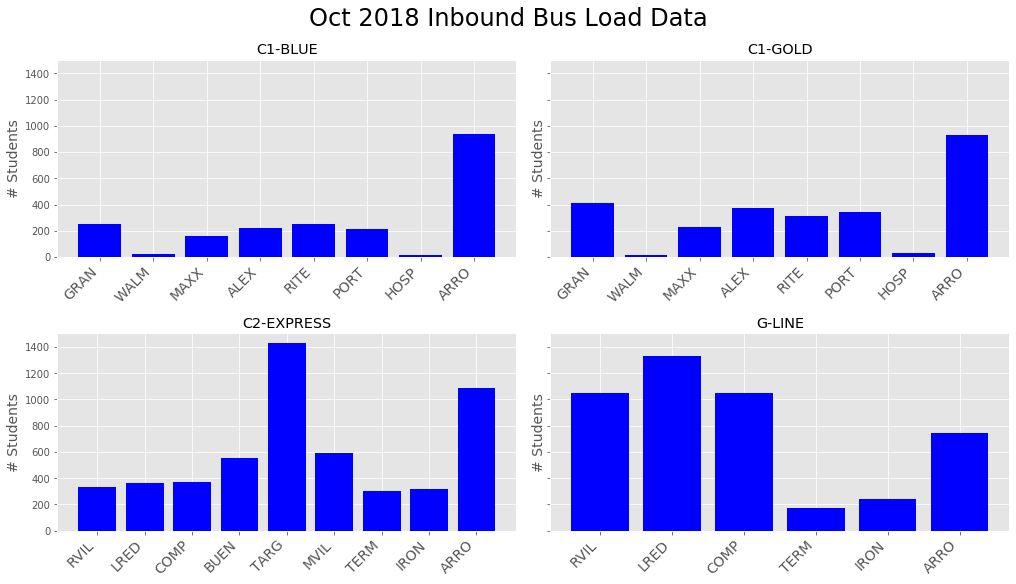

In [27]:
oct_ttls = [c1b_ttl, c1g_ttl, c2e_ttl, g_ttl]
first_col = ['C1-BLUE', 'C1-GOLD', 'C2-EXPRESS', 'G-LINE']

fig, axs = plt.subplots(2,2, figsize = (14,8), sharey=True, constrained_layout=True)
for i, ax in enumerate(axs.flat):
    ax.bar(oct_ttls[i].index, oct_ttls[i].iloc[:, -1], color='blue')
    ax.set_xticklabels(labels=oct_ttls[i].index, rotation=45, ha='right', fontsize=14)
    ax.set_title(first_col[i])
    ax.set_ylabel('# Students', fontsize=14)

fig.suptitle('Oct 2018 Inbound Bus Load Data', fontsize=24)
# fig.savefig('Oct-2018-plot.png')

In [28]:
c2e_ttl.sum().iloc[:-1]
# c2e_ttl

5:25      55.0
6:25     253.0
7:45     724.0
8:45     744.0
9:45     704.0
11:05    705.0
12:05    403.0
13:05    251.0
14:25    354.0
15:25    203.0
16:25    230.0
17:45    251.0
18:45    187.0
19:45    130.0
20:45    104.0
22:05     54.0
dtype: float64

Text(0.5, 0.98, 'Inbound Student Load versus Time')

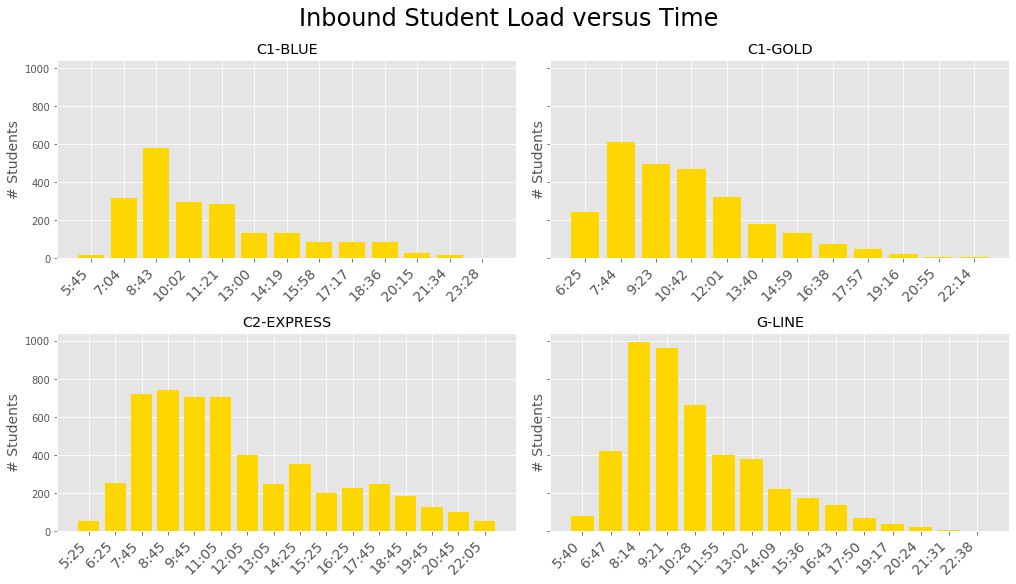

In [29]:
fig, axs = plt.subplots(2,2, figsize = (14,8), sharey=True, constrained_layout=True)
for i, ax in enumerate(axs.flat):
    ax.bar(oct_ttls[i].columns[:-1], oct_ttls[i].sum().iloc[:-1], color='gold')
    ax.set_xticklabels(labels=oct_ttls[i].columns[:-1], rotation=45, ha='right', fontsize=14)
    ax.set_title(first_col[i])
    ax.set_ylabel('# Students', fontsize=14)

fig.suptitle('Inbound Student Load versus Time', fontsize=24)
# fig.savefig('Oct-2018-time.png')